## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

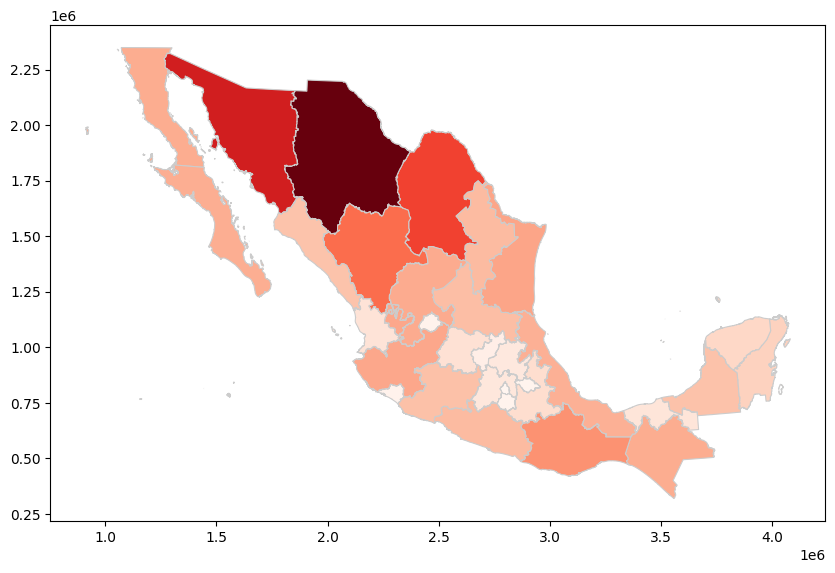

In [2]:
estados = gpd.read_file("/usr/src/app/Estados/conjunto_de_datos/00ent.shp")

estados['area'] = estados['geometry'].area

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.plot(column='area', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Mostrar el mapa
plt.show()

#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [3]:
escuelas = gpd.read_file("./Escuelas/conjunto_de_datos/denue_inegi_61_.shp")



escuelas = escuelas.to_crs(epsg=6362)  
escuelas['buffer'] = escuelas['geometry'].buffer(5000) 


union_escuelas = escuelas['buffer'].unary_union

area_escuelas = union_escuelas.area  


estados = estados.to_crs(epsg=6362)

area_mexico =estados['area'].sum()

print("Area total de México: ", area_mexico)
print("Area de todas las escuelas: ", area_escuelas)
print("Porcentaje de México con escuelas: ", (area_escuelas / area_mexico) * 100, "%")

Area total de México:  1954679731500.8462
Area de todas las escuelas:  315853613414.90894
Porcentaje de México con escuelas:  16.158842204415226 %


#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [4]:
cdmx = estados.loc[estados['NOMGEO'] == 'Ciudad de México', 'geometry'].squeeze()
estados['distancia_a_cdmx'] = estados['geometry'].apply(lambda x: x.distance(cdmx))
for estado, distancia in zip(estados['NOMGEO'], estados['distancia_a_cdmx']):
    print("distancia de", estado, "a ciudad de México: ", distancia)

distancia de Aguascalientes a ciudad de México:  379557.1162411258
distancia de Baja California a ciudad de México:  1645551.3484594303
distancia de Baja California Sur a ciudad de México:  1127556.5315466602
distancia de Campeche a ciudad de México:  682973.8302870456
distancia de Coahuila de Zaragoza a ciudad de México:  573236.1610961865
distancia de Colima a ciudad de México:  431986.95740321313
distancia de Chiapas a ciudad de México:  579734.4592714674
distancia de Chihuahua a ciudad de México:  913759.0235854753
distancia de Ciudad de México a ciudad de México:  0.0
distancia de Durango a ciudad de México:  618267.6628894915
distancia de Guanajuato a ciudad de México:  128951.54787875125
distancia de Guerrero a ciudad de México:  50114.395289197215
distancia de Hidalgo a ciudad de México:  28546.022266230684
distancia de Jalisco a ciudad de México:  305170.9850513644
distancia de México a ciudad de México:  0.0
distancia de Michoacán de Ocampo a ciudad de México:  88191.62757323

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [9]:
servicios = gpd.read_file('tareas/190838_JFUM/Denue_00_54/conjunto_de_datos')
servicios.head(5)

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,5240,01001541941000131001000000U1,VETERINARIA MASCOTITAS,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,AVENIDA,CONVENCION DE 1914 SUR,CALLE,...,0869,004,4499781776,None,None,Fijo,21.865883,-102.296168,2010-07,POINT (-102.29617 21.86588)
1,28079,01001541941000991000000000U8,VETERINARIA MISHO,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,CALLE,FELIPE ANGELES,CALLE,...,091A,010,4491141677,None,None,Fijo,21.871951,-102.273028,2014-12,POINT (-102.27303 21.87195)
2,42202,01001541941000771000000000U4,VETERINARIA MAINVET CENTER,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,AVENIDA,AGUASCALIENTES NORTE,CALLE,...,3083,018,None,None,None,Fijo,21.915086,-102.277956,2014-12,POINT (-102.27796 21.91509)
3,44080,01001541941000851000000000U4,VETERINARIA MARYCAN,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,CALLE,PISCIS,CALLE,...,3187,036,4492242459,None,None,Fijo,21.903773,-102.275770,2014-12,POINT (-102.27577 21.90377)
4,33506,01001812990000511000000000U0,VETERINARIA NARICES FRESCAS,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,AVENIDA,AVENIDA DE LOS MAESTROS,AVENIDA,...,287A,012,4493378304,None,None,Fijo,21.858007,-102.314479,2014-12,POINT (-102.31448 21.85801)


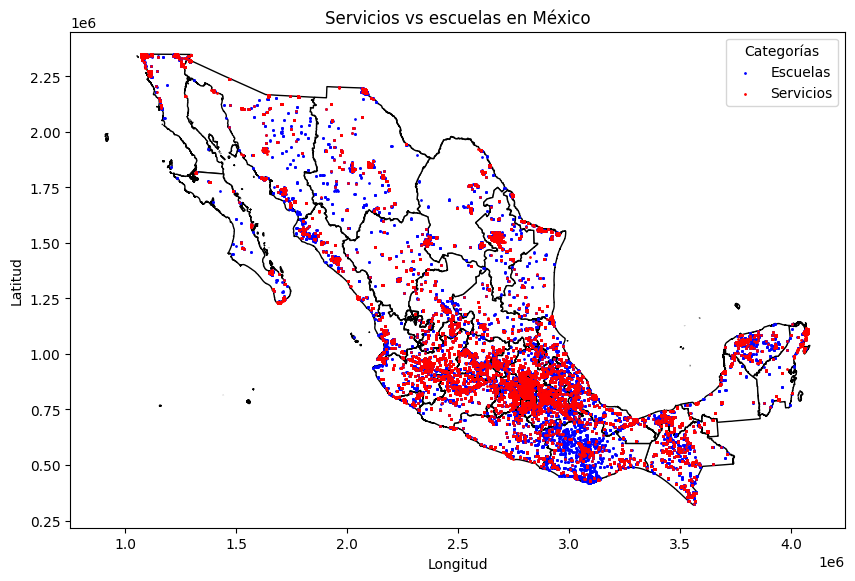

In [27]:
regex = r"(?i)(primaria|escuela básica|escuela elemental|secundaria|escuela media|educación media|preparatoria|bachillerato|prepa|colegio)"
escuelas = escuelas[escuelas['nom_estab'].str.extract(regex, expand=False).notna()]

fig, ax = plt.subplots(figsize=(10, 10))
estados.plot(ax=ax, color='white', edgecolor='black')


escuelas.plot(ax=ax, color='blue', markersize=1, label='Escuelas')
servicios = servicios.to_crs("EPSG:6362")
servicios.plot(ax=ax, color='red', markersize=1, label='Servicios')

plt.legend(title='Categorías')
plt.title('Servicios vs escuelas en México')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Podemos ver que la mayoria de los puntos rojos y azules se encuentran en la parte centro del pais, pero si vemos que al norte en especifico hay mas pun